<a href="https://colab.research.google.com/github/Echevarriaj93/DATA6545-MLOPS/blob/main/Final_Copy_of_Submission_Comp_2_Process_1A_DATA6545_Evaluation_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA 6545 Project 1 Evaluation Code**
- ver. 1.1
Developed by: Dr. Jie Tao

This is the sample evaluation code provided for your project 1. 
- You should evaluated your processed data using this code whenever possible, and record the results;
- Do not modify this code here - create a __copy__ if you decide to do so.
- Note that due to randomness, although I will use the same code to evaluate your final submissions, the results might be slightly different.

In [ ]:
# import required package for data ingestion
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

# balance the data
from imblearn.over_sampling import SMOTE

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in the Data

In [ ]:
### you should change data_path to point to your OWN data file

# data_df=pd.read_csv('/content/drive/MyDrive/Competition 2/1A_Comp2_data.csv',index_col = [0])

# path = '/content/drive/MyDrive/Competition 2/Copy of 1A_Comp2_data.csv'


# data_df=pd.read_csv(path, index_col = [0])

data_df = pd.read_csv('/content/drive/MyDrive/Competition 2/Validation/1A_Comp2_data.csv' ,index_col = [0])



data_df.head()

payment_type_AA  payment_type_AB  payment_type_AC  payment_type_AD  \
0              0.0              1.0              0.0              0.0   
1              0.0              0.0              1.0              0.0   
2              0.0              1.0              0.0              0.0   
3              0.0              1.0              0.0              0.0   
4              1.0              0.0              0.0              0.0   

   payment_type_AE  employment_status_CA  employment_status_CB  \
0              0.0                   0.0                   0.0   
1              0.0                   1.0                   0.0   
2              0.0                   1.0                   0.0   
3              0.0                   1.0                   0.0   
4              0.0                   1.0                   0.0   

   employment_status_CC  employment_status_CD  employment_status_CE  ...  \
0                   0.0                   0.0                   1.0  ...   
1                   0.0                   0.0                   0.0  ...   
2                   0.0                   0.0                   0.0  ...   
3                   0.0                   0.0                   0.0  ...   
4                   0.0                   0.0                   0.0  ...   

   intended_balcon_amount  zip_count_4w  velocity_24h  \
0               -0.158446     -0.175296      0.285161   
1               -0.786806      0.345471      0.831407   
2               -0.446408      1.471642      0.213568   
3               -0.605166     -0.120243     -0.155112   
4               -0.624368      0.185866     -0.837955   

   date_of_birth_distinct_emails_4w  credit_risk_score  bank_months_count  \
0                         -0.381985           0.392543           0.489618   
1                          0.770112          -0.722193          -1.025964   
2                          0.045941           1.196837           1.279958   
3                          0.045941          -0.547560          -1.025964   
4                          1.914619          -1.649208           1.211648   

   proposed_credit_limit  session_length_in_minutes  \
0              -0.779975                  -0.472376   
1              -0.779975                   0.693189   
2               1.522476                   0.952936   
3              -0.779975                  -0.021511   
4              -0.779975                   0.175339   

   device_distinct_emails_8w  fraud_bool  
0                  -0.110163           0  
1                  -0.110163           0  
2                  -0.110163           1  
3                  -0.110163           0  
4                  -0.110163           0  

[5 rows x 78 columns]

In [ ]:
# get a list of feature names
list(data_df.columns)

['payment_type_AA',
 'payment_type_AB',
 'payment_type_AC',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CA',
 'employment_status_CB',
 'employment_status_CC',
 'employment_status_CD',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'employment_status_nan',
 'email_is_free_0',
 'email_is_free_1',
 'housing_status_BA',
 'housing_status_BB',
 'housing_status_BC',
 'housing_status_BD',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'housing_status_nan',
 'phone_home_valid_0',
 'phone_home_valid_1',
 'phone_mobile_valid_0',
 'phone_mobile_valid_1',
 'has_other_cards_0',
 'has_other_cards_1',
 'foreign_request_0.0',
 'foreign_request_1.0',
 'foreign_request_nan',
 'source_INTERNET',
 'source_TELEAPP',
 'device_os_linux',
 'device_os_macintosh',
 'device_os_other',
 'device_os_windows',
 'device_os_x11',
 'keep_alive_session_0.0',
 'keep_alive_session_1.0',
 'keep_alive_session_nan',
 'referred_employee',
 'referred_not referred'

### NOTE:

1. This code only include 1 target here - you can only evaluate 1 target at a time. If you want to evaluate another target, define another `y`.
2. It is the norm you arrange your features as *continuous*, *categorical*, and *target* features. If you do not do it this way, you should use indexing similar to below:
```python
y = data_df['Y']
X = data_df.drop['Y']
```

In [ ]:
# # define features and target
# X = data_df.iloc[:,:-1].values
# y = data_df.iloc[:,-1].values
# # if you want a secondary target
# ### y1 = ...

In [ ]:
X = data_df.drop('fraud_bool', axis = 1).values
y = data_df['fraud_bool'].values

In [ ]:
#original

# top_k =['payment_type_AB', 'payment_type_AC', 'employment_status_CA',
#        'email_is_free_0', 'email_is_free_1', 'housing_status_BA',
#        'phone_home_valid_0', 'device_os_windows',
#        'keep_alive_session_0.0', 'referred_not referred',
#        'referred_referred', 'under_loan_0', 'under_loan_1',
#        'canceled_other_cards_yes', 'default_loan_or_card_yes',
#        'bb_count_8w_bool_0', 'income_lvl_high', 'age_bins_0',
#        'age_bins_1', 'Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3',
#        'name_email_similarity', 'current_address_months_count',
#        'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
#        'velocity_24h', 'date_of_birth_distinct_emails_4w',
#        'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
#        'device_distinct_emails_8w']

# + 5
#top_k = ['payment_type_AB', 'payment_type_AC', 'payment_type_AD',
#       'employment_status_CA', 'email_is_free_0', 'email_is_free_1',
#       'housing_status_BA', 'phone_home_valid_0', 'phone_home_valid_1',
#       'phone_mobile_valid_0', 'device_os_windows',
#       'keep_alive_session_0.0', 'referred_not referred',
#       'referred_referred', 'under_loan_0', 'under_loan_1',
#       'canceled_other_cards_no', 'default_loan_or_card_yes',
#       'bb_count_8w_bool_0', 'bb_count_8w_bool_1', 'income_lvl_high',
#       'income_lvl_medium', 'age_bins_0', 'Quarters_Q1', 'Quarters_Q2',
#       'Quarters_Q3', 'name_email_similarity',
#       'current_address_months_count', 'days_since_request',
#       'intended_balcon_amount', 'zip_count_4w', 'velocity_24h',
#       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
#       'bank_months_count', 'proposed_credit_limit',
#       'session_length_in_minutes', 'device_distinct_emails_8w']


# - 5
top_k = ['payment_type_AC', 'email_is_free_0', 'email_is_free_1',
       'housing_status_BA', 'phone_home_valid_0', 'phone_home_valid_1',
       'device_os_windows', 'keep_alive_session_0.0', 'referred_referred',
       'under_loan_0', 'under_loan_1', 'income_lvl_high', 'age_bins_1',
       'Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3',
       'name_email_similarity', 'current_address_months_count',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_24h', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'device_distinct_emails_8w']

In [ ]:
X1 = data_df[top_k]

In [ ]:
### y should be binary
assert len(np.unique(y)) == 2

In [ ]:
X1.shape, y.shape

((100000, 28), (100000,))

In [ ]:
# resample/balance the data
# note although we do not balance data this way, 
# this works the best for this project
sm = SMOTE(random_state = 2023) 
X_res, y_res = sm.fit_resample(X1, y) 

In [ ]:
X_res.shape, y_res.shape

((197794, 28), (197794,))

In [ ]:
# define the model
clf = LogisticRegression(max_iter=2000)

# **Initial Evaluation w. Logistic Regression**

In [ ]:
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
  '''
  return evaluation results (f1-score or ROC_AUC). 
  Built in k-fold evaluation.
  INPUTS:
  ----
  - X: features; DataFrame or Numpy ndarray;
  - y: target; DataFrame or Numpy ndarray;
  - classifier: any sklearn (or its add-on) based classifier
  - k: number of folds in cross validation
  - scoring: evaluation metric ('f1' default or 'roc_auc')
  OUTPUT:
  ----
  bias/variance score of selected metric. Both lower the better
  - bias: mean of the metric over cross validation, measure the accruracy
  - variance: std.ev. of the metric, measure the consistency.
  '''
  scores = []
  for i in range(1):
    #### generate random numbers to shuffle the data for training and test
    np.random.seed(2021)
    random_int = np.random.randint(0,3000)
    #### create cross validation folds
    kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
    #### record the score
    score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
    scores.append(score)
  scores = np.array(scores)
  #### we need to calculate the bias (average score) and viariance (std)
  bias, variance = 1 - round(scores.mean(),4), round(scores.std(),4) #### combine into model eval
  return(bias, variance)

In [ ]:
# getting averaged f1_score from 10-fold CV (default)

#LR model does not meet Naiva Bayes accuracy of 99% should be .07

my_eval(X_res, y_res, clf, 10)

(0.19810000000000005, 0.0016)

In [ ]:
# getting averaged ROC_AUC from 10-fold CV
my_eval(X_res, y_res, clf, 10, 'roc_auc')

(0.11939999999999995, 0.0019)

# **Model Evaluation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier

# balance the data
from imblearn.over_sampling import SMOTE

from scipy.stats import ttest_ind

import datetime
from tqdm import tqdm
from itertools import combinations

RANDOM_STATE = int(datetime.date.today().year)

#recall

from sklearn.metrics import recall_score

In [ ]:
models = {
  "dt": DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10),
  "lr": LogisticRegression(max_iter=2000),
  "svc": LinearSVC(max_iter=5000),
  "gnb": GaussianNB(),
  "rf": RandomForestClassifier(max_depth=10),
  "sgd": SGDClassifier(loss="hinge"),
  "gb": GradientBoostingClassifier() ### takes long to train, commented out for demo purpose
}

In [ ]:
## Number of folds in k-old
k = 10
### f1-macro used since it's a multiclass classification problem
### use f1 if binary
METRICS = ['f1_macro', 'roc_auc', 'recall_weighted', 'recall'] ### also, AUC is not supported for multi-class problems
ROUNDS = 1 ## evaluation rounds

In [ ]:
# combine this code with eval code from comp 1

# 4 scores must be generated --> F1 Bias, Variance, AUC Bias and Variance

def model_eval(X_res, y_res, models, metrics=METRICS, k=k, rounds=ROUNDS):
  """evaluating multiple models"""
  res = {}
  
  # sm = SMOTE(random_state = RANDOM_STATE)
  # X_res, y_res = sm.fit_resample(X1, y)
  for model_name, classifier in models.items():
    print("training {} ...".format(classifier))
    scores = []
    for i in tqdm(range(rounds)):
      np.random.seed(RANDOM_STATE)
      random_int = np.random.randint(0,3000)
      kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
      scores.append(model_selection.cross_val_score(classifier, X=X_res, y=y_res, cv=kfold, scoring=metrics))
    # res['Score'] = np.array(scores).flatten()

    # bias[model_name + 'bias'] = 1 - round(np.array(scores).mean(),4)
    # variance[model_name + '_variance'] = round(np.array(scores).std(),4)
    res[model_name] = np.array(scores).flatten()
    # bias[model_name + '_bias'] = 1 - round(np.array(scores).mean(),4)
    # variance[model_name + '_variance'] = round(np.array(scores).std(),4)   
  return res

### Extract Bias and Variance Scores

In [ ]:
#Used after scores are pushed into dataframes in order to create df strcitly 
#for bias and variance scores

def get_bivar(df):
  '''
  -Takes a dataframe as a parameter.
  -Creates 3 list for model name, bias score and variance score.
  -Lists are apended into the bivar dictionary to be turned into a DF after the
  function is run.

  '''

  name = []
  bias = []
  variance = []

  bivar = {}

  for col in df.columns:
    name.append(col)
    bias.append(1 - round(np.array(df[col]).mean(),4))
    variance.append(round(np.array(df[col]).std(),4))

  bivar['model'] = name
  bivar['bias'] = bias
  bivar['var'] = variance

  return bivar

### F1 Bias and Variance Scores

In [ ]:
#DF of raw F1 Scores for each models' 10 folds

# f1_scores = pd.DataFrame(model_eval(X_res, y_res, models, metrics = "f1"))

# f1_scores

In [ ]:
f1_scores = pd.read_csv('/content/drive/MyDrive/Competition 2/Evaluation Code/1a_f1_scores_data.csv',index_col = [0] )

# out_path = '/content/drive/MyDrive/Competition 2/Evaluation Code/1a_f1_scores_data.csv'
# f1_scores.to_csv(out_path)

f1_scores

dt        lr       svc       gnb        rf       sgd        gb
0  0.939470  0.801092  0.800183  0.794716  0.968758  0.800909  0.976251
1  0.948422  0.801773  0.800384  0.793761  0.969622  0.797925  0.974258
2  0.948624  0.800916  0.799857  0.791966  0.968255  0.802343  0.977287
3  0.942907  0.805616  0.805061  0.796927  0.970612  0.804904  0.974465
4  0.943716  0.800205  0.799138  0.793793  0.966587  0.794581  0.974359
5  0.945553  0.801527  0.800306  0.791906  0.966083  0.799351  0.974047
6  0.944901  0.804303  0.803349  0.795181  0.969011  0.806848  0.974145
7  0.949579  0.802813  0.801655  0.793900  0.970981  0.804427  0.976628
8  0.945039  0.799696  0.798535  0.795696  0.970710  0.789050  0.976780
9  0.946450  0.801024  0.800472  0.795519  0.971154  0.793591  0.976179

<Axes: >

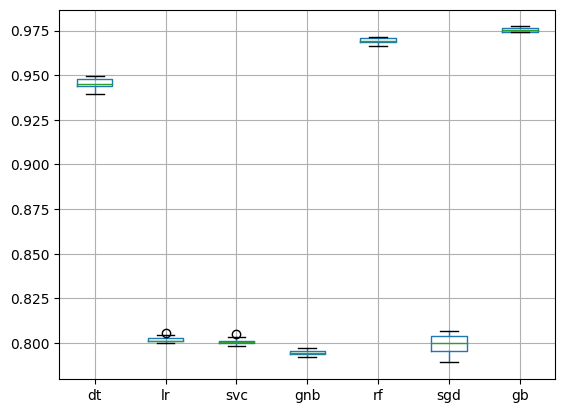

In [ ]:
#Raw F1 Scores

f1_scores.boxplot()

<Axes: xlabel='model'>

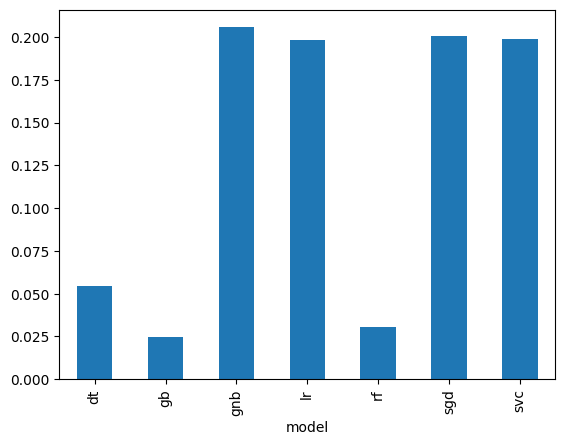

In [ ]:
# DF for F1 Bias and Variance

f1_bivar_df = pd.DataFrame(get_bivar(f1_scores))

#Test
f1_bivar_df.groupby('model')['bias'].mean().plot(kind='bar')

### AUC ROC Bias and Variance Scores

In [ ]:
#DF of raw AUC Scores for each models' 10 folds

# auc_scores = pd.DataFrame(model_eval(X_res, y_res, models, metrics = "roc_auc"))



In [ ]:
auc_scores = pd.read_csv('/content/drive/MyDrive/Competition 2/Evaluation Code/1a_auc_scores_data.csv', index_col = [0])

# out_path = '/content/drive/MyDrive/Competition 2/Evaluation Code/1a_auc_scores_data.csv'
# auc_scores.to_csv(out_path)

auc_scores

dt        lr       svc       gnb        rf       sgd        gb
0  0.987392  0.881756  0.881649  0.875701  0.995592  0.880587  0.996300
1  0.989607  0.879132  0.879104  0.868509  0.995210  0.877373  0.995973
2  0.989757  0.878582  0.878637  0.871350  0.995334  0.877169  0.996723
3  0.988388  0.882627  0.882612  0.875588  0.995708  0.881644  0.996292
4  0.987895  0.880512  0.880465  0.873380  0.995273  0.876271  0.996574
5  0.988924  0.878093  0.877990  0.870117  0.994593  0.875146  0.995491
6  0.989064  0.881260  0.881102  0.871668  0.995714  0.879295  0.996776
7  0.989945  0.882191  0.882164  0.873812  0.995930  0.881351  0.996297
8  0.988937  0.879343  0.879283  0.873014  0.995844  0.876835  0.996731
9  0.989081  0.882467  0.882432  0.875920  0.996000  0.880728  0.996644

<Axes: >

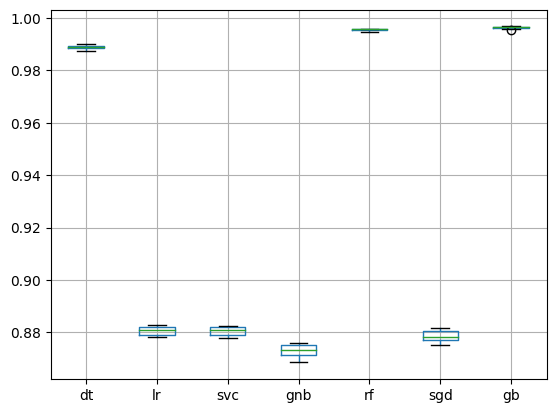

In [ ]:
#Raw AUC ROC scores

auc_scores.boxplot()

<Axes: xlabel='model'>

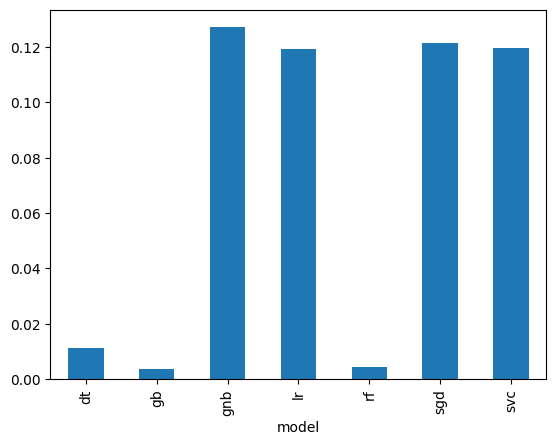

In [ ]:
# DF for AUC Bias and Variance

auc_bivar_df = pd.DataFrame(get_bivar(auc_scores))

#Test
auc_bivar_df.groupby('model')['bias'].mean().plot(kind='bar')

### Visualizing Bias and Variance Scores

<ipython-input-32-a4faba170a3e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'AUC Variance')

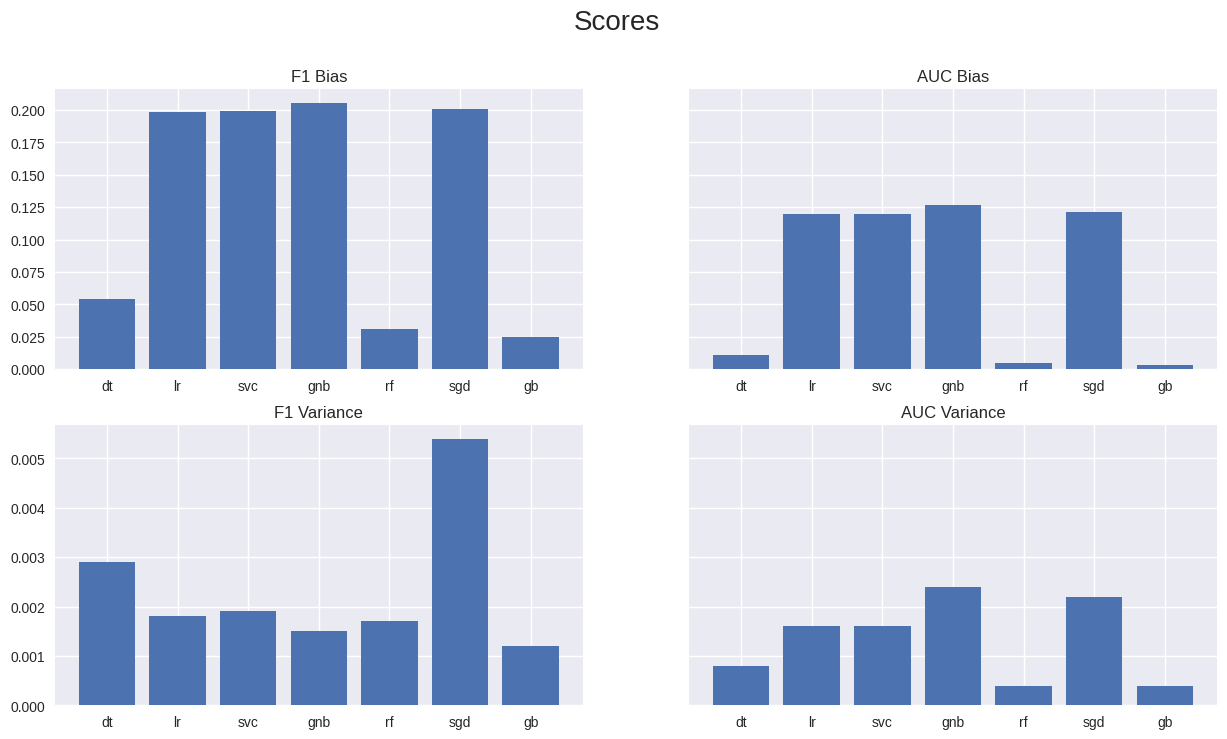

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharey='row')
fig.suptitle('Scores', fontsize=20)


#Bias
axs[0,0].bar(f1_bivar_df['model'], f1_bivar_df['bias'])
axs[0,0].set_title('F1 Bias')

axs[0,1].bar(auc_bivar_df['model'], auc_bivar_df['bias'])
axs[0,1].set_title('AUC Bias')

#Variance
axs[1,0].bar(f1_bivar_df['model'], f1_bivar_df['var'])
axs[1,0].set_title('F1 Variance')

axs[1,1].bar(auc_bivar_df['model'], auc_bivar_df['var'])
axs[1,1].set_title('AUC Variance')


### Explanation of model choice: 

# - Out of our 6 piplines this process (1A) provided the best scores with the initial Logistic Regression Model Evaluation.

# - Since we are dealing with an imbalanced distribution in our target values, it is best to go with F1 Variance however since we care about getting the most True positives and minimizing false negatives the most we have opted to use Recall since we don't care about precision as much.




In [ ]:
#1A

f1_bivar_df[['model','bias', 'var']].sort_values('var')

model    bias     var
6    gb  0.0246  0.0012
3   gnb  0.2057  0.0015
4    rf  0.0308  0.0017
1    lr  0.1981  0.0018
2   svc  0.1991  0.0019
0    dt  0.0545  0.0029
5   sgd  0.2006  0.0054

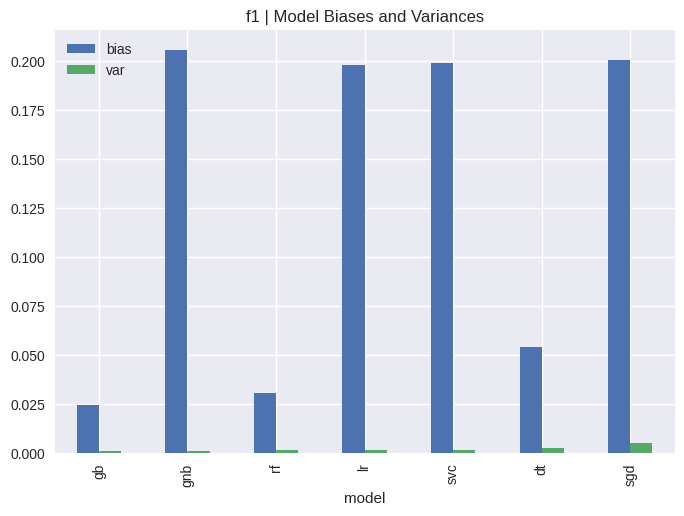

In [ ]:
barplot = pd.pivot_table(f1_bivar_df, index=['model'], values = ['bias','var']).sort_values('var').plot(kind = 'bar')
plt.title('f1 | Model Biases and Variances')



plt.style.use('ggplot')

### Recall Scores

In [ ]:
recall_scores = pd.DataFrame(model_eval(X_res, y_res, models, metrics = "recall"))

training DecisionTreeClassifier(max_depth=10, random_state=2023) ...


100%|██████████| 1/1 [00:34<00:00, 34.63s/it]


training LogisticRegression(max_iter=2000) ...


100%|██████████| 1/1 [00:07<00:00,  7.18s/it]


training LinearSVC(max_iter=5000) ...


100%|██████████| 1/1 [25:13<00:00, 1513.93s/it]


training GaussianNB() ...


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


training RandomForestClassifier(max_depth=10) ...


100%|██████████| 1/1 [07:22<00:00, 442.03s/it]


training SGDClassifier() ...


100%|██████████| 1/1 [00:10<00:00, 10.38s/it]


training GradientBoostingClassifier() ...


100%|██████████| 1/1 [21:37<00:00, 1297.89s/it]


In [ ]:
recall_scores

dt        lr       svc       gnb        rf       sgd        gb
0  0.915476  0.803284  0.799534  0.774298  0.969494  0.803993  0.966555
1  0.928322  0.795561  0.792262  0.765670  0.973208  0.784365  0.966710
2  0.928738  0.798396  0.794742  0.766521  0.970663  0.813420  0.969648
3  0.925792  0.802748  0.800742  0.769755  0.973726  0.806558  0.966306
4  0.920106  0.796291  0.793233  0.768878  0.971365  0.785998  0.968104
5  0.927345  0.800020  0.796769  0.769536  0.969617  0.800528  0.966772
6  0.918343  0.800784  0.795957  0.766593  0.973250  0.808025  0.964300
7  0.931892  0.799635  0.796285  0.768879  0.974726  0.815164  0.969143
8  0.927850  0.796989  0.793250  0.769604  0.974535  0.767482  0.969179
9  0.924224  0.793467  0.791337  0.767194  0.973321  0.766180  0.966525

In [ ]:
recall_bivar = pd.DataFrame(get_bivar(recall_scores))


<Axes: xlabel='model'>

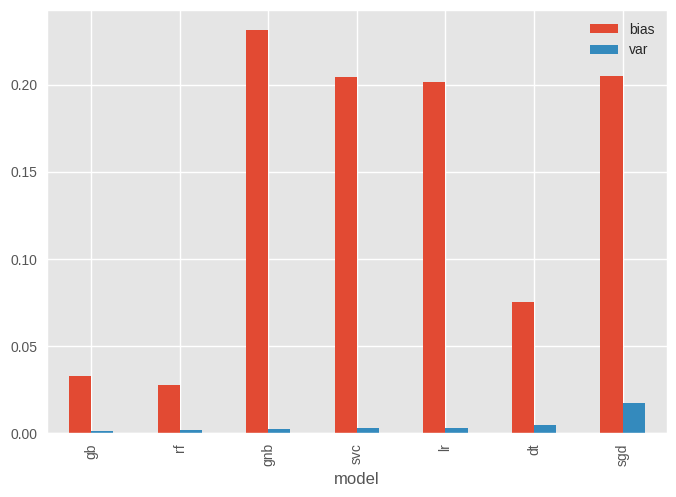

In [ ]:
pd.pivot_table(recall_bivar, index=['model'], values = ['bias','var']).sort_values('var').plot(kind = 'bar')

In [ ]:
recall_bivar

model    bias     var
0    dt  0.0752  0.0050
1    lr  0.2013  0.0030
2   svc  0.2046  0.0029
3   gnb  0.2313  0.0023
4    rf  0.0276  0.0019
5   sgd  0.2048  0.0172
6    gb  0.0327  0.0016

#**Hyperparameter Tuning**

## Random Search Cross Validation

#### We choose Random search because it does not take as long to run as Grid Search and more often than not gets the same or better results. The theory is that by choosing at Random you are more ikely to identify the most important features instead of the Grid search which gives all features equal importance.

In [ ]:
import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [ ]:
#Top 3 models
dt = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=10)
rf = RandomForestClassifier(max_depth=10)
gb = GradientBoostingClassifier()

### Decision Tree

In [ ]:
# Decision Tree Parameters

dt_params = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

#Random Search

random_dt = RandomizedSearchCV(estimator=dt, scoring='recall', param_distributions=dt_params, cv = 3, n_jobs=-1)

start_time = time.time()
random_dt_result = random_dt.fit(X_res, y_res)
# Summarize results
print("Best: %f using %s" % (random_dt_result.best_score_, random_dt_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.987725 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Execution time: 18.13987112045288 ms


In [ ]:
optimal_dt = {'opt_dt' : DecisionTreeClassifier(criterion = 'entropy', max_depth= None, max_features = 6, min_samples_leaf= 1)}
               

#### Decision Tree Variance Score

In [ ]:
opt_dt_scores = pd.DataFrame(model_eval(X_res, y_res, optimal_dt, metrics = "recall"))

dt_bivar_df = pd.DataFrame(get_bivar(opt_dt_scores))



training DecisionTreeClassifier(criterion='entropy', max_features=6) ...


100%|██████████| 1/1 [00:10<00:00, 11.00s/it]


In [ ]:
dt_bivar_df

model    bias     var
0  opt_dt  0.0107  0.0009

#### Decision Tree Visualization

In [ ]:
from sklearn import tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171583 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171583 to fit



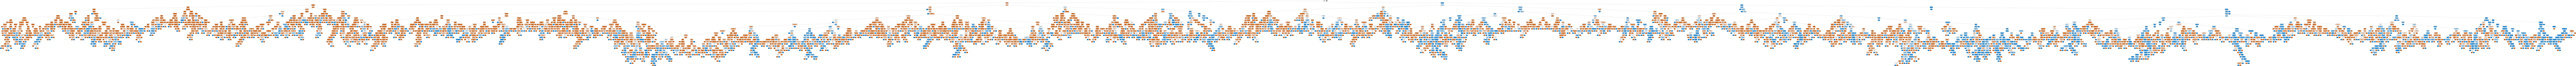

In [ ]:
optimal_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, max_features = 6, min_samples_leaf= 1)

fit_opt_dt = optimal_dt.fit(X_res, y_res)

feature_cols = X_res.columns

from six import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus


# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(fit_opt_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fraud_bool-pruned.png')
Image(graph.create_png())

In [ ]:
X_res.columns


Index(['payment_type_AC', 'email_is_free_0', 'email_is_free_1',
       'housing_status_BA', 'phone_home_valid_0', 'phone_home_valid_1',
       'device_os_windows', 'keep_alive_session_0.0', 'referred_referred',
       'under_loan_0', 'under_loan_1', 'income_lvl_high', 'age_bins_1',
       'Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3', 'name_email_similarity',
       'current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_24h',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'device_distinct_emails_8w'],
      dtype='object')

#### Text Representation of DT

In [ ]:
text_representation = tree.export_text(fit_opt_dt, max_depth=10,feature_names=['payment_type_AC', 'email_is_free_0', 'email_is_free_1',
       'housing_status_BA', 'phone_home_valid_0', 'phone_home_valid_1',
       'device_os_windows', 'keep_alive_session_0.0', 'referred_referred',
       'under_loan_0', 'under_loan_1', 'income_lvl_high', 'age_bins_1',
       'Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3', 'name_email_similarity',
       'current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_24h',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'device_distinct_emails_8w'])
print(text_representation)

|--- housing_status_BA <= 0.00
|   |--- email_is_free_1 <= 0.00
|   |   |--- device_os_windows <= 0.00
|   |   |   |--- under_loan_1 <= 1.00
|   |   |   |   |--- income_lvl_high <= 0.00
|   |   |   |   |   |--- under_loan_1 <= 0.00
|   |   |   |   |   |   |--- proposed_credit_limit <= 1.52
|   |   |   |   |   |   |   |--- bank_months_count <= 0.48
|   |   |   |   |   |   |   |   |--- phone_home_valid_0 <= 0.00
|   |   |   |   |   |   |   |   |   |--- velocity_24h <= 0.55
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- velocity_24h >  0.55
|   |   |   |   |   |   |   |   |   |   |--- session_length_in_minutes <= -1.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- session_length_in_minutes >  -1.96
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- phone_home_valid_0 >  0.00
|   |   |   |   |   |   |   |   |   |--- date_of_

#### Decision Tree Zoom Out View

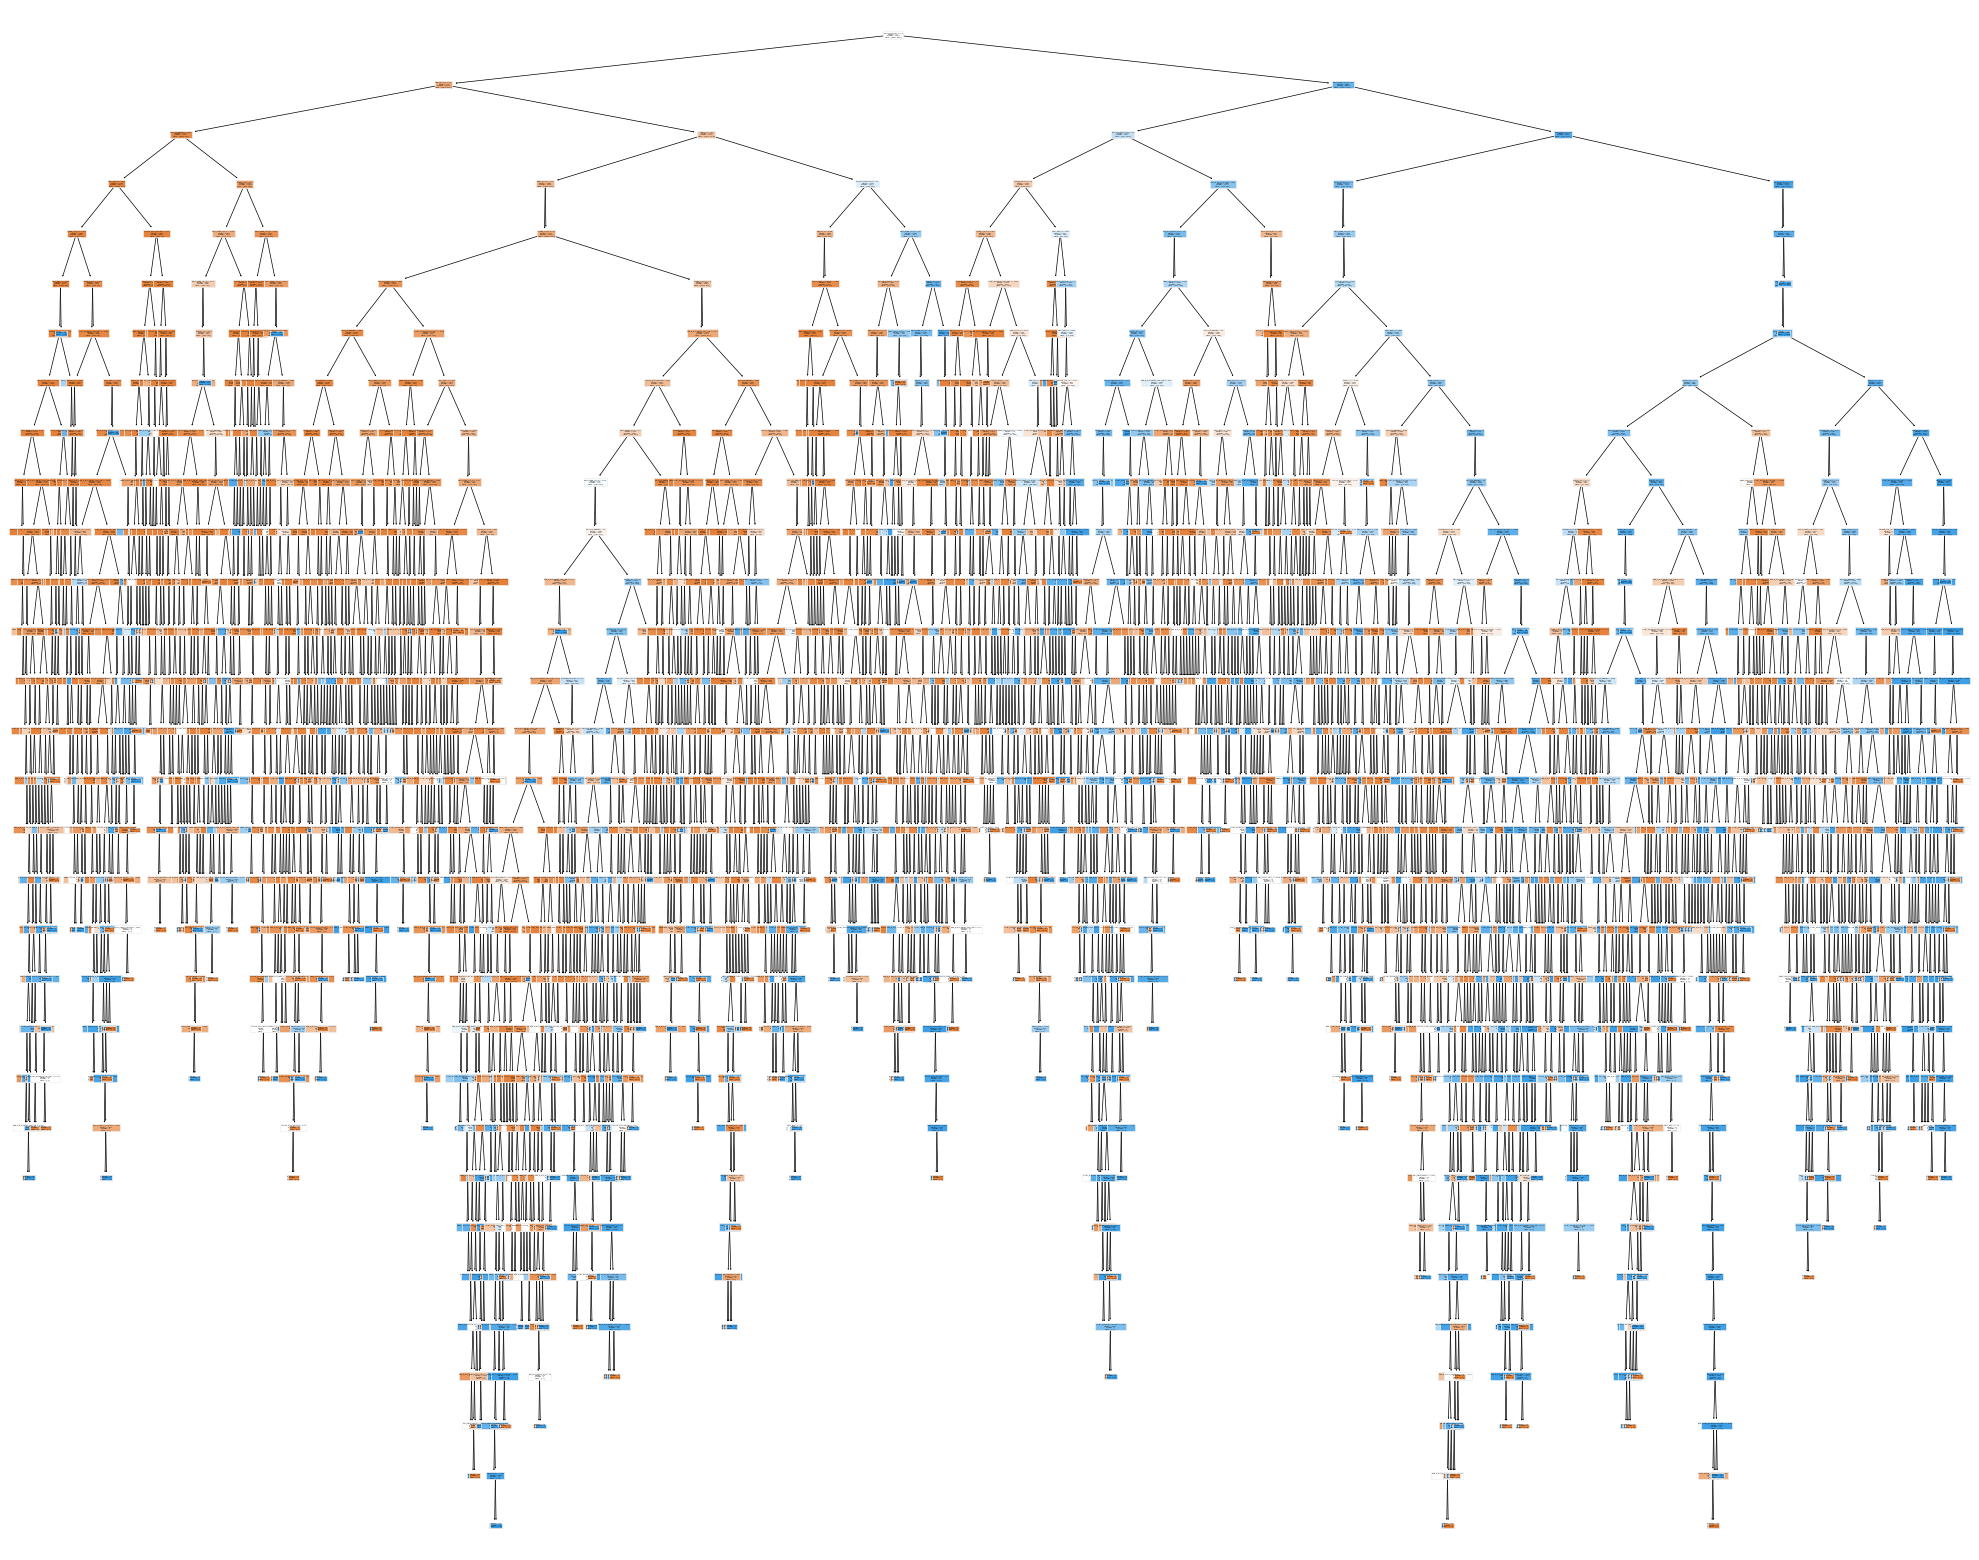

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(fit_opt_dt, feature_names=X_res.columns, filled=True)

#### The decision tree model is the fastest running model but has the worst score. The visualization of the tree above is also difficult to explain and unapealing for an audience. 

### Random Forest

In [ ]:

np.random.seed(7)


#random forest parameters
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


rf_random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

#Random search
random_rf = RandomizedSearchCV(estimator=rf, scoring='recall', param_distributions=rf_random_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_rf_result = random_rf.fit(X_res, y_res)
# Summarize results
print("Best: %f using %s" % (random_rf_result.best_score_, random_rf_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.991284 using {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Execution time: 168.548668384552 ms


#### Random Forest Variance Score











In [ ]:
# fitting optimal hyperparameters into a RF model

optimal_rf = {'opt_rf' : RandomForestClassifier(n_estimators = 20, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, bootstrap = True)
}

In [ ]:
#Testing the result of the suggested optimal hyper parameters

opt_rf_scores = pd.DataFrame(model_eval(X_res, y_res, optimal_rf, metrics = "recall"))

rf_bivar_df = pd.DataFrame(get_bivar(opt_rf_scores))

training RandomForestClassifier(max_depth=30, n_estimators=20) ...


100%|██████████| 1/1 [01:50<00:00, 110.79s/it]


In [ ]:
# Bias and variance of the optimal RF model

rf_bivar_df 

model    bias     var
0  opt_rf  0.0085  0.0009

##### Our Random forest model is the best performing. It does not take much longer than the Decision Tree model to run and gets better results consistently. The variance score is the same after running an evaluation however the Bias score is also lower. This mean our model is less likely to underfit and we know that an advantage of Random Forest is that it does not overfit because it chooses its result based on a voting system comprosed of multiple decision trees. 

#### Random Forest Feature Importance

In [ ]:
#Create a Gaussian Classifier
rs_opt_rf = RandomForestClassifier(n_estimators = 20, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, bootstrap = True)

#Train the model using the training sets y_pred=clf.predict(X_test)
rs_opt_rf.fit(X_res,y_res)

RandomForestClassifier(max_depth=30, n_estimators=20)

In [ ]:
feature_imp = pd.Series(rs_opt_rf.feature_importances_,index=X_res.columns).sort_values(ascending=False)
feature_imp

housing_status_BA                   0.207414
device_os_windows                   0.131151
keep_alive_session_0.0              0.086267
income_lvl_high                     0.070729
phone_home_valid_0                  0.045550
phone_home_valid_1                  0.041039
email_is_free_0                     0.036702
email_is_free_1                     0.036676
current_address_months_count        0.036377
age_bins_1                          0.035173
date_of_birth_distinct_emails_4w    0.024362
name_email_similarity               0.022929
proposed_credit_limit               0.019995
intended_balcon_amount              0.019881
credit_risk_score                   0.019792
payment_type_AC                     0.017876
Quarters_Q2                         0.016759
referred_referred                   0.015434
zip_count_4w                        0.014909
velocity_24h                        0.014459
session_length_in_minutes           0.013872
under_loan_1                        0.013679
days_since

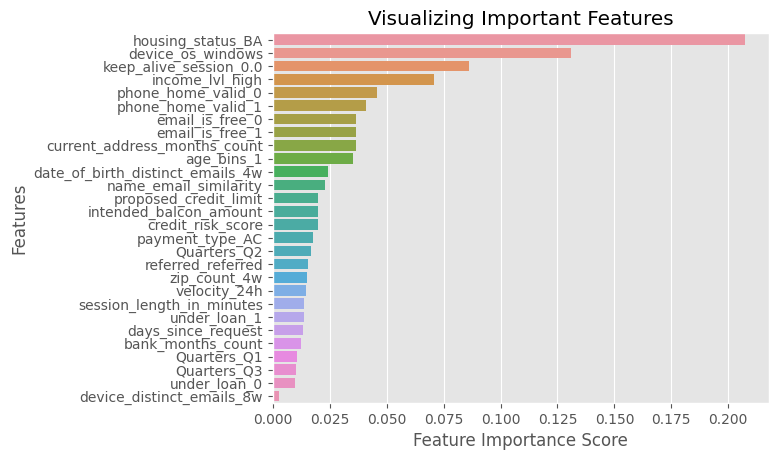

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend(iris.feature_names)
plt.show()

In [ ]:

opt_rf_scores = pd.DataFrame(model_eval(X_res[feature_imp.keys()[:21]],y_res, optimal_rf, metrics = "recall"))

rf_bivar_df = pd.DataFrame(get_bivar(opt_rf_scores))

#Score Records
##Base Opt model: .0085, .0009
##Top 25: .0084, .0007 
##Top 15: .0095, .0005
##Top 21: 0.0082	0.0007
##Top 22: 0.0084	0.0006

training RandomForestClassifier(max_depth=30, n_estimators=20) ...


100%|██████████| 1/1 [01:48<00:00, 108.76s/it]


In [ ]:
rf_bivar_df

model    bias     var
0  opt_rf  0.0082  0.0007

#### After a few trials we found that keeping the top 21 or 22 features would provide the best results. Both feature sets provide better scores than the Base optimal model score with a lsight trade off in Bias and Variance between the two. If we only had to choose one I would say 21 features since Random forests models already handle the problem of overfitting so a lower Bias score would be better to address underfitting.

### Gradient Boost

In [ ]:
# Gradient Boosting Prameters

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

gb_parameters = {"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }
#Random search
random_gb = RandomizedSearchCV(estimator=gb,scoring='recall', param_distributions=gb_parameters, cv = 3, n_jobs=-1)

start_time = time.time()
random_gb_result = random_gb.fit(X_res, y_res)
# Summarize results
print("Best: %f using %s" % (random_gb_result.best_score_, random_gb_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.989090 using {'learning_rate': 0.4677528597449807, 'max_depth': 9, 'n_estimators': 704, 'subsample': 0.951248343865582}
Execution time: 13408.066853523254 ms


##### While the Gradient Boost scores higher than the Decision Tree model, it took 4 hours to run which makes it very inefficient. It is also less explainable than a typical Decision Tree.

### TPOT

In [ ]:
!pip install tpot

import pandas as pd
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 16.0 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=9ce45db81a5c9a1c6f7978faa83a31d469766e1eedd2dd5f30d1a7d0498b48a1
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [ ]:
SEED = 2023

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

In [ ]:
from pandas.core.common import random_state
from tpot import TPOTClassifier
tpot = TPOTClassifier(verbosity=2, max_time_mins=120,cv=cv,scoring='recall',random_state=SEED, 
                      max_eval_time_mins=0.4, population_size=15)
tpot.fit(X_res, y_res)

Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8745158396727437

Generation 2 - Current best internal CV score: 0.8745158396727437

Generation 3 - Current best internal CV score: 0.8910887207968001

Generation 4 - Current best internal CV score: 0.8910887207968001

Generation 5 - Current best internal CV score: 0.8910887207968001

Generation 6 - Current best internal CV score: 0.8933637808388992

Generation 7 - Current best internal CV score: 0.8933637808388992

Generation 8 - Current best internal CV score: 0.940918364728159

Generation 9 - Current best internal CV score: 0.940918364728159

Generation 10 - Current best internal CV score: 0.940918364728159

Generation 11 - Current best internal CV score: 0.940918364728159

Generation 12 - Current best internal CV score: 0.940918364728159

Generation 13 - Current best internal CV score: 0.940918364728159

Generation 14 - Current best internal CV score: 0.940918364728159

Generation 15 - Current best internal CV score: 0.9409183647281

TPOTClassifier(cv=StratifiedKFold(n_splits=10, random_state=2023, shuffle=True),
               max_eval_time_mins=0.4, max_time_mins=120, population_size=15,
               random_state=2023, scoring='recall', verbosity=2)

In [ ]:
tpot.export('tpot_exported_pipeline.py')

#### TPOT was unable to generate a better score or a match for our optimal models using Random Search.

# Model Predictions on Test Data

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Competition 2/Evaluation Code/1A_Comp2_testdata.csv', index_col = [0])


X_test = test_data[X_res.columns] 



## Decision Tree

In [ ]:
optimal_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, max_features = 6, min_samples_leaf= 1)

optimal_dt.fit(X_res,y_res)

dt_y_pred = optimal_dt.predict(X_test)

dt_y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Random Forest

In [ ]:
rs_opt_rf = RandomForestClassifier(n_estimators = 20, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, bootstrap = True)

# X_test
# #Train the model using the training sets y_pred=clf.predict(X_test)
rs_opt_rf.fit(X_res,y_res)

rf_y_pred = rs_opt_rf.predict(X_test)

rf_y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Gradient Boost

In [ ]:
rs_opt_gb = GradientBoostingClassifier(learning_rate= 0.4677528597449807, max_depth = 9, n_estimators =  704, subsample = 0.951248343865582)

rs_opt_gb.fit(X_res,y_res)

gb_y_pred = rs_opt_gb.predict(X_test)

gb_y_pred 

array([0, 0, 0, ..., 0, 1, 0])